<a href="https://colab.research.google.com/github/mojtabaSefidi/Dataminig-small-projects/blob/main/clustering_datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.cluster import AgglomerativeClustering ,OPTICS,Birch,DBSCAN,KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
sn.set()

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00512/AsianReligionsData.zip
!unzip AsianReligionsData.zip

--2022-01-01 08:40:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/00512/AsianReligionsData.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 644098 (629K) [application/x-httpd-php]
Saving to: ‘AsianReligionsData.zip’

AsianReligionsData. 100%[===================>] 629.00K  1.79MB/s    in 0.3s    

2022-01-01 08:40:54 (1.79 MB/s) - ‘AsianReligionsData.zip’ saved [644098/644098]

Archive:  AsianReligionsData.zip
  inflating: AllBooks_baseline_DTM_Labelled.csv  
  inflating: AllBooks_baseline_DTM_Unlabelled.csv  
  inflating: Complete_data .txt      


In [321]:
data = pd.read_csv('AllBooks_baseline_DTM_Unlabelled.csv')
data = data.rename(columns={'# foolishness': 'foolishness'})
data.head()

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,diadem,rushed,saliva,revelation,indirectly,open,distortions,expecteth,perishing,rage,unbridled,looketh,washed,nursingmother,caper,prosperous,lightmindedness,imprisonment,maghavan,supported,distinctions,lambs,illumination,mercury,partakers,tell,build,neither,soft,detraction,...,budding,enjoyer,needs,sittest,eclipsed,engagement,exuberant,abandons,well,cheerfulness,hatest,state,stained,production,whitened,revered,developed,regarded,enactments,aromatical,admireth,foothold,shots,turner,inversion,lifeless,postponement,stout,taketh,kettle,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


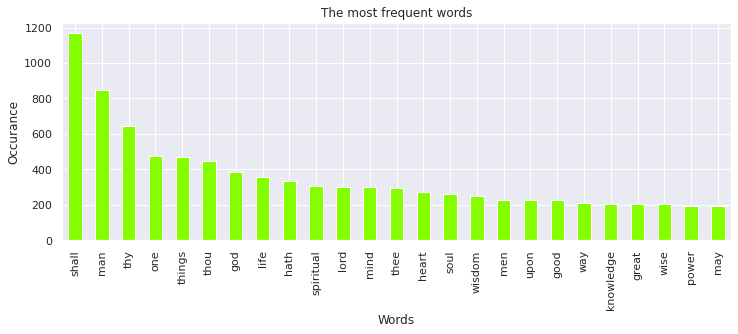

In [322]:
plt.figure(figsize=(12,4))
plt.xlabel('Words')
plt.ylabel('Occurance')
plt.title('The most frequent words')
data.sum(axis=0).sort_values(ascending=False).iloc[:25].plot(kind = 'bar',color='#85FF00')

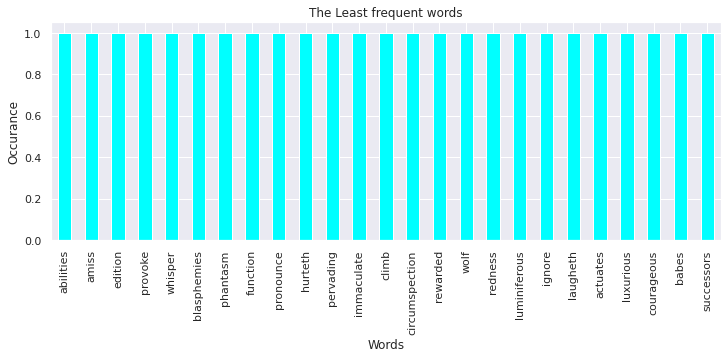

In [323]:
plt.figure(figsize=(12,4))
plt.xlabel('Words')
plt.ylabel('Occurance')
plt.title('The Least frequent words')
data.sum(axis=0).sort_values(ascending=False).iloc[-25:].plot(kind = 'bar',color='cyan')

In [459]:
print('80% of words occur less than',np.percentile(data.sum(axis=0).sort_values(ascending=False),80),'times')
print('60% of words occur less than',np.percentile(data.sum(axis=0).sort_values(ascending=False),60),'times')
print('50% of words occur less than',np.percentile(data.sum(axis=0).sort_values(ascending=False),50),'times')
print('The avarage occurance of the words is',int(data.sum(axis=0).sort_values(ascending=False).mean()),'times')

80% of words occur less than 6.0 times
60% of words occur less than 3.0 times
50% of words occur less than 2.0 times
The avarage occurance of the words is 7 times


In [325]:
Q1 = np.percentile(data.sum(axis=0).sort_values(ascending=False),80)
Q2 = np.percentile(data.sum(axis=0).sort_values(ascending=False),60)
dataQ1 = data.sum(axis=0).sort_values(ascending=False)<Q1
dataQ2 = data.sum(axis=0).sort_values(ascending=False)>Q2
condition = np.logical_and(dataQ1 , dataQ2).to_numpy()
condition

array([False, False, False, ..., False, False, False])

In [326]:
dataset  = data.loc[:, condition]
clustered_data = dataset.copy()
dataset.shape

(590, 757)

In [327]:
Kmeans_model = KMeans(8,random_state=1)
Kmeans_model.fit(dataset)
clustered_data["Kmeans_clusters"] = Kmeans_model.fit_predict(dataset)

print('Clustering Evaluation based on silhouette score score :',silhouette_score(dataset, clustered_data["Kmeans_clusters"],metric='euclidean').round(2))
print('Clustering Evaluation based on dunn_index score :',davies_bouldin_score(dataset, clustered_data["Kmeans_clusters"]).round(2))
print('Clustering Evaluation based on calinski_harabasz score :',calinski_harabasz_score(dataset, clustered_data["Kmeans_clusters"]).round(2))

Clustering Evaluation based on silhouette score score : 0.39
Clustering Evaluation based on dunn_index score : 1.51
Clustering Evaluation based on calinski_harabasz score : 160.84


In [328]:
GM_model = GaussianMixture(n_components=8,random_state=1)
GM_model.fit(dataset)
clustered_data["GM_clusters"] = GM_model.predict(dataset)

print('Clustering Evaluation based on silhouette score score :',silhouette_score(dataset, clustered_data["GM_clusters"],metric='euclidean').round(2))
print('Clustering Evaluation based on dunn_index score :',davies_bouldin_score(dataset, clustered_data["GM_clusters"]).round(2))
print('Clustering Evaluation based on calinski_harabasz score :',calinski_harabasz_score(dataset, clustered_data["GM_clusters"]).round(2))

Clustering Evaluation based on silhouette score score : 0.45
Clustering Evaluation based on dunn_index score : 1.37
Clustering Evaluation based on calinski_harabasz score : 157.99


In [329]:
Hierarchical_model = AgglomerativeClustering(n_clusters=8)
clustered_data["Hierarchical_clusters"] = Hierarchical_model.fit_predict(dataset)

print('Clustering Evaluation based on silhouette score score :',silhouette_score(dataset, clustered_data["Hierarchical_clusters"],metric='euclidean').round(2))
print('Clustering Evaluation based on dunn_index score :',davies_bouldin_score(dataset, clustered_data["Hierarchical_clusters"]).round(2))
print('Clustering Evaluation based on calinski_harabasz score :',calinski_harabasz_score(dataset, clustered_data["Hierarchical_clusters"]).round(2))

Clustering Evaluation based on silhouette score score : 0.31
Clustering Evaluation based on dunn_index score : 1.56
Clustering Evaluation based on calinski_harabasz score : 159.49


In [330]:
birch_model = Birch(n_clusters=8)
clustered_data["birch_clusters"] = birch_model.fit_predict(dataset)

print('Clustering Evaluation based on silhouette score score :',silhouette_score(dataset, clustered_data["birch_clusters"],metric='euclidean').round(2))
print('Clustering Evaluation based on dunn_index score :',davies_bouldin_score(dataset, clustered_data["birch_clusters"]).round(2))
print('Clustering Evaluation based on calinski_harabasz score :',calinski_harabasz_score(dataset, clustered_data["birch_clusters"]).round(2))
print()

Clustering Evaluation based on silhouette score score : 0.3
Clustering Evaluation based on dunn_index score : 1.57
Clustering Evaluation based on calinski_harabasz score : 159.48



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but Birch was fitted with feature names
  "X does not have valid feature names, but"


Shuffle dataset

In [331]:
new_dataset = dataset.sample(frac=1)
clustered_shuffle_data = new_dataset.copy()


In [332]:
Kmeans_model = KMeans(8,random_state=1)
Kmeans_model.fit(new_dataset)
clustered_shuffle_data["Kmeans_clusters"] = Kmeans_model.fit_predict(new_dataset)

print('Clustering Evaluation based on silhouette score score :',silhouette_score(new_dataset, clustered_shuffle_data["Kmeans_clusters"],metric='euclidean').round(2))
print('Clustering Evaluation based on dunn_index score :',davies_bouldin_score(new_dataset, clustered_shuffle_data["Kmeans_clusters"]).round(2))
print('Clustering Evaluation based on calinski_harabasz score :',calinski_harabasz_score(new_dataset, clustered_shuffle_data["Kmeans_clusters"]).round(2))

Clustering Evaluation based on silhouette score score : 0.47
Clustering Evaluation based on dunn_index score : 1.29
Clustering Evaluation based on calinski_harabasz score : 162.74


In [333]:
GM_model = GaussianMixture(n_components=8,random_state=1)
GM_model.fit(new_dataset)
clustered_shuffle_data["GM_clusters"] = GM_model.predict(new_dataset)

print('Clustering Evaluation based on silhouette score score :',silhouette_score(new_dataset, clustered_shuffle_data["GM_clusters"],metric='euclidean').round(2))
print('Clustering Evaluation based on dunn_index score :',davies_bouldin_score(new_dataset, clustered_shuffle_data["GM_clusters"]).round(2))
print('Clustering Evaluation based on calinski_harabasz score :',calinski_harabasz_score(new_dataset, clustered_shuffle_data["GM_clusters"]).round(2))

Clustering Evaluation based on silhouette score score : 0.39
Clustering Evaluation based on dunn_index score : 1.34
Clustering Evaluation based on calinski_harabasz score : 157.71


In [334]:
Hierarchical_model = AgglomerativeClustering(n_clusters=8)
clustered_shuffle_data["Hierarchical_clusters"] = Hierarchical_model.fit_predict(new_dataset)

print('Clustering Evaluation based on silhouette score score :',silhouette_score(new_dataset, clustered_shuffle_data["Hierarchical_clusters"],metric='euclidean').round(2))
print('Clustering Evaluation based on dunn_index score :',davies_bouldin_score(new_dataset, clustered_shuffle_data["Hierarchical_clusters"]).round(2))
print('Clustering Evaluation based on calinski_harabasz score :',calinski_harabasz_score(new_dataset, clustered_shuffle_data["Hierarchical_clusters"]).round(2))

Clustering Evaluation based on silhouette score score : 0.45
Clustering Evaluation based on dunn_index score : 1.22
Clustering Evaluation based on calinski_harabasz score : 159.6


In [335]:
birch_model = Birch(n_clusters=8)
clustered_shuffle_data["birch_clusters"] = birch_model.fit_predict(new_dataset)

print('Clustering Evaluation based on silhouette score score :',silhouette_score(new_dataset, clustered_shuffle_data["birch_clusters"],metric='euclidean').round(2))
print('Clustering Evaluation based on dunn_index score :',davies_bouldin_score(new_dataset, clustered_shuffle_data["birch_clusters"]).round(2))
print('Clustering Evaluation based on calinski_harabasz score :',calinski_harabasz_score(new_dataset, clustered_shuffle_data["birch_clusters"]).round(2))
print()

Clustering Evaluation based on silhouette score score : 0.3
Clustering Evaluation based on dunn_index score : 1.57
Clustering Evaluation based on calinski_harabasz score : 159.48



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but Birch was fitted with feature names
  "X does not have valid feature names, but"


Dimonsionality reduction using PCA


In [412]:
clustered_data_pca = data.copy()
pca = PCA(2)
pca_result = pca.fit_transform(data)
print(pca.explained_variance_ratio_)


[0.16802291 0.10736928]


In [446]:
Kmeans_model = KMeans(8,random_state=1)
Kmeans_model.fit(pca_result)
clustered_data_pca["Kmeans_clusters"] = Kmeans_model.fit_predict(pca_result)

print('Clustering Evaluation based on silhouette score score :',silhouette_score(pca_result, clustered_data_pca["Kmeans_clusters"],metric='euclidean').round(2))
print('Clustering Evaluation based on dunn_index score :',davies_bouldin_score(pca_result, clustered_data_pca["Kmeans_clusters"]).round(2))
print('Clustering Evaluation based on calinski_harabasz score :',calinski_harabasz_score(pca_result, clustered_data_pca["Kmeans_clusters"]).round(2))

Clustering Evaluation based on silhouette score score : 0.67
Clustering Evaluation based on dunn_index score : 0.5
Clustering Evaluation based on calinski_harabasz score : 4435.31


In [387]:
GM_model = GaussianMixture(n_components=8,random_state=1)
GM_model.fit(pca_result)
clustered_data_pca["GM_clusters"] = GM_model.predict(pca_result)

print('Clustering Evaluation based on silhouette score score :',silhouette_score(pca_result, clustered_data_pca["GM_clusters"],metric='euclidean').round(2))
print('Clustering Evaluation based on dunn_index score :',davies_bouldin_score(pca_result, clustered_data_pca["GM_clusters"]).round(2))
print('Clustering Evaluation based on calinski_harabasz score :',calinski_harabasz_score(pca_result, clustered_data_pca["GM_clusters"]).round(2))

Clustering Evaluation based on silhouette score score : 0.24
Clustering Evaluation based on dunn_index score : 1.23
Clustering Evaluation based on calinski_harabasz score : 537.72


In [388]:
Hierarchical_model = AgglomerativeClustering(n_clusters=8)
clustered_data_pca["Hierarchical_clusters"] = Hierarchical_model.fit_predict(pca_result)

print('Clustering Evaluation based on silhouette score score :',silhouette_score(pca_result, clustered_data_pca["Hierarchical_clusters"],metric='euclidean').round(2))
print('Clustering Evaluation based on dunn_index score :',davies_bouldin_score(pca_result, clustered_data_pca["Hierarchical_clusters"]).round(2))
print('Clustering Evaluation based on calinski_harabasz score :',calinski_harabasz_score(pca_result, clustered_data_pca["Hierarchical_clusters"]).round(2))

Clustering Evaluation based on silhouette score score : 0.76
Clustering Evaluation based on dunn_index score : 0.5
Clustering Evaluation based on calinski_harabasz score : 3817.59


In [389]:
birch_model = Birch(n_clusters=8)
clustered_data_pca["birch_clusters"] = birch_model.fit_predict(pca_result)

print('Clustering Evaluation based on silhouette score score :',silhouette_score(pca_result, clustered_data_pca["birch_clusters"],metric='euclidean').round(2))
print('Clustering Evaluation based on dunn_index score :',davies_bouldin_score(pca_result, clustered_data_pca["birch_clusters"]).round(2))
print('Clustering Evaluation based on calinski_harabasz score :',calinski_harabasz_score(pca_result, clustered_data_pca["birch_clusters"]).round(2))
print()

Clustering Evaluation based on silhouette score score : 0.76
Clustering Evaluation based on dunn_index score : 0.43
Clustering Evaluation based on calinski_harabasz score : 3927.61



Dimonsionality reduction using TSNE


In [413]:
clustered_data_tsne = data.copy()
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(data)

In [391]:
Kmeans_model = KMeans(8,random_state=1)
Kmeans_model.fit(tsne_result)
clustered_data_tsne["Kmeans_clusters"] = Kmeans_model.fit_predict(tsne_result)

print('Clustering Evaluation based on silhouette score score :',silhouette_score(tsne_result, clustered_data_tsne["Kmeans_clusters"],metric='euclidean').round(2))
print('Clustering Evaluation based on dunn_index score :',davies_bouldin_score(tsne_result, clustered_data_tsne["Kmeans_clusters"]).round(2))
print('Clustering Evaluation based on calinski_harabasz score :',calinski_harabasz_score(tsne_result, clustered_data_tsne["Kmeans_clusters"]).round(2))

Clustering Evaluation based on silhouette score score : 0.38
Clustering Evaluation based on dunn_index score : 0.8
Clustering Evaluation based on calinski_harabasz score : 544.32


In [392]:
GM_model = GaussianMixture(n_components=8,random_state=1)
GM_model.fit(tsne_result)
clustered_data_tsne["GM_clusters"] = GM_model.predict(tsne_result)

print('Clustering Evaluation based on silhouette score score :',silhouette_score(tsne_result, clustered_data_tsne["GM_clusters"],metric='euclidean').round(2))
print('Clustering Evaluation based on dunn_index score :',davies_bouldin_score(tsne_result, clustered_data_tsne["GM_clusters"]).round(2))
print('Clustering Evaluation based on calinski_harabasz score :',calinski_harabasz_score(tsne_result, clustered_data_tsne["GM_clusters"]).round(2))

Clustering Evaluation based on silhouette score score : 0.36
Clustering Evaluation based on dunn_index score : 0.81
Clustering Evaluation based on calinski_harabasz score : 491.44


In [393]:
Hierarchical_model = AgglomerativeClustering(n_clusters=8)
clustered_data_tsne["Hierarchical_clusters"] = Hierarchical_model.fit_predict(tsne_result)

print('Clustering Evaluation based on silhouette score score :',silhouette_score(tsne_result, clustered_data_tsne["Hierarchical_clusters"],metric='euclidean').round(2))
print('Clustering Evaluation based on dunn_index score :',davies_bouldin_score(tsne_result, clustered_data_tsne["Hierarchical_clusters"]).round(2))
print('Clustering Evaluation based on calinski_harabasz score :',calinski_harabasz_score(tsne_result, clustered_data_tsne["Hierarchical_clusters"]).round(2))

Clustering Evaluation based on silhouette score score : 0.3
Clustering Evaluation based on dunn_index score : 0.93
Clustering Evaluation based on calinski_harabasz score : 422.34


In [394]:
birch_model = Birch(n_clusters=8)
clustered_data_tsne["birch_clusters"] = birch_model.fit_predict(tsne_result)

print('Clustering Evaluation based on silhouette score score :',silhouette_score(tsne_result, clustered_data_tsne["birch_clusters"],metric='euclidean').round(2))
print('Clustering Evaluation based on dunn_index score :',davies_bouldin_score(tsne_result, clustered_data_tsne["birch_clusters"]).round(2))
print('Clustering Evaluation based on calinski_harabasz score :',calinski_harabasz_score(tsne_result, clustered_data_tsne["birch_clusters"]).round(2))
print()

Clustering Evaluation based on silhouette score score : 0.32
Clustering Evaluation based on dunn_index score : 0.92
Clustering Evaluation based on calinski_harabasz score : 412.1



DBScan Algorithm

In [450]:
DBS_model = DBSCAN(eps=0.5, min_samples=3).fit(pca_result)
DBS_labels = DBS_model.labels_
n_clusters_ = len(set(DBS_labels)) - (1 if -1 in DBS_labels else 0) + 1
n_noise_ = list(DBS_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 15
Estimated number of noise points: 45


In [451]:
print('Clustering Evaluation based on silhouette score score :',silhouette_score(pca_result, DBS_labels,metric='euclidean').round(2))
print('Clustering Evaluation based on dunn_index score :',davies_bouldin_score(pca_result, DBS_labels).round(2))
print('Clustering Evaluation based on calinski_harabasz score :',calinski_harabasz_score(pca_result, DBS_labels).round(2))

Clustering Evaluation based on silhouette score score : 0.5
Clustering Evaluation based on dunn_index score : 1.63
Clustering Evaluation based on calinski_harabasz score : 45.21


In [452]:
DBS_model_2 = DBSCAN(eps=1, min_samples=3).fit(pca_result)
DBS_labels = DBS_model_2.labels_
n_clusters_ = len(set(DBS_labels)) - (1 if -1 in DBS_labels else 0) + 1
n_noise_ = list(DBS_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 7
Estimated number of noise points: 12


In [453]:
print('Clustering Evaluation based on silhouette score score :',silhouette_score(pca_result, DBS_labels,metric='euclidean').round(2))
print('Clustering Evaluation based on dunn_index score :',davies_bouldin_score(pca_result, DBS_labels).round(2))
print('Clustering Evaluation based on calinski_harabasz score :',calinski_harabasz_score(pca_result, DBS_labels).round(2))

Clustering Evaluation based on silhouette score score : 0.73
Clustering Evaluation based on dunn_index score : 1.53
Clustering Evaluation based on calinski_harabasz score : 158.63


In [4]:
conclusion = pd.DataFrame([['KMeans++ model defualt dataset',0.39,1.51,160.84],
              ['GaussianMixture model defualt dataset',0.45,1.37,157.99],
              ['Agglomerative model defualt dataset',0.31,1.56,159.49],
              ['Birch model defualt dataset',0.3,1.57,159.48],
              ['KMeans++ model shuffled dataset',0.47,1.29,162.74],
              ['GaussianMixture model shuffled dataset',0.39,1.34,157.71],
              ['Agglomerative model shuffled dataset',0.45,1.22,159.6],
              ['Birch model shuffled dataset',0.3,1.57,159.48],
              ['KMeans++ model & PCA',0.67,0.5,4435.31],
              ['GaussianMixture & PCA',0.24,1.23,537.72],
              ['Agglomerative model & PCA',0.76,0.5,3817.59],
              ['Birch model & PCA',0.76,0.43,3927.61],
              ['KMeans++ model & TSNE',0.38,0.8,544.32],
              ['GaussianMixture & TSNE',0.36,0.81,491.44],
              ['Agglomerative model & TSNE',0.3,0.93,422.34],
              ['Birch & TSNE',0.32,0.92,412.1],
              ['DBSCAN (eps=0.5)',0.5,1.63,45.21],
              ['DBSCAN (eps=1)',0.73,1.53,158.63]],
              columns=["Algorithm","Silhouette ","Dunn index","Calinski Harabasz"])
conclusion.style.background_gradient(cmap="YlOrRd")

,Algorithm,Silhouette,Dunn index,Calinski Harabasz
0,KMeans++ model defualt dataset,0.390000,1.510000,160.840000
1,GaussianMixture model defualt dataset,0.450000,1.370000,157.990000
2,Agglomerative model defualt dataset,0.310000,1.560000,159.490000
3,Birch model defualt dataset,0.300000,1.570000,159.480000
4,KMeans++ model shuffled dataset,0.470000,1.290000,162.740000
5,GaussianMixture model shuffled dataset,0.390000,1.340000,157.710000
6,Agglomerative model shuffled dataset,0.450000,1.220000,159.600000
7,Birch model shuffled dataset,0.300000,1.570000,159.480000
8,KMeans++ model & PCA,0.670000,0.500000,4435.310000
9,GaussianMixture & PCA,0.240000,1.230000,537.720000


In [ ]:
data2 = pd.read_csv('AllBooks_baseline_DTM_Labelled.csv')
data2 = data2.rename(columns={'Unnamed: 0': 'label'})
data2.label = data2.label.str.replace(r'_.*', r'')
data2['label'].value_counts()

YogaSutra                189
Upanishad                162
TaoTeChing                81
BookOfEccleasiasticus     50
Buddhism                  46
BookOfProverb             31
BookOfWisdom              19
BookOfEcclesiastes        12
Name: label, dtype: int64

In [ ]:
unique, counts = np.unique(DBS_labels, return_counts=True)
db_values = sorted(dict(zip(unique, counts)).values(),reverse=True)

Text(0.5, 1.0, 'DBscan')

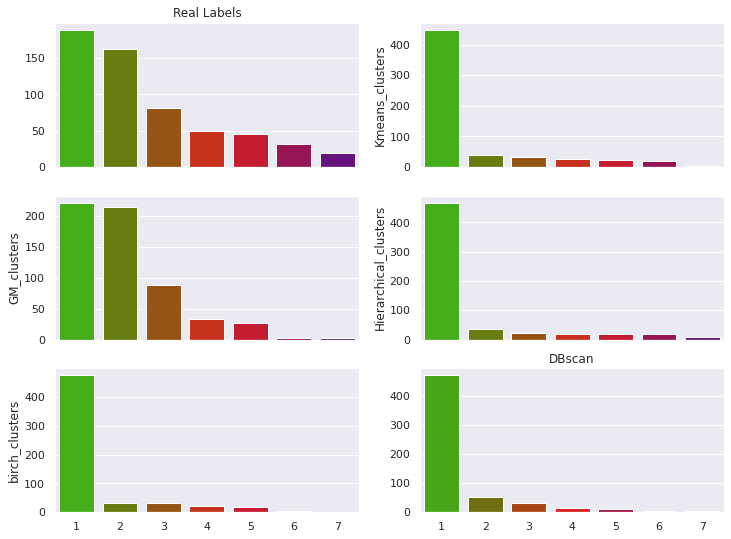

In [ ]:
range1 = list(range(1,8))
range2 = list(range(1,9))
f, axes = plt.subplots(3, 2, figsize=(12, 9), sharex=True)
sn.barplot(x=range2, y = list(data2['label'].value_counts()),palette="brg_r",ax=axes[0, 0])
sn.barplot(x=range2, y=clustered_data_pca["Kmeans_clusters"].value_counts(),palette="brg_r",ax=axes[0, 1])
sn.barplot(x=range2, y=clustered_data_pca["GM_clusters"].value_counts(),palette="brg_r",ax=axes[1, 0])
sn.barplot(x=range2, y=clustered_data_pca["Hierarchical_clusters"].value_counts(),palette="brg_r",ax=axes[1, 1])
sn.barplot(x=range2, y=clustered_data_pca["birch_clusters"].value_counts(),palette="brg_r",ax=axes[2, 0])
sn.barplot(x=range1, y = db_values,palette="brg_r",ax=axes[2, 1])
axes[0, 0].set_title("Real Labels")
axes[2, 1].set_title("DBscan")